[('like', 1167), ('feel', 1036), ('people', 946), ('know', 914), ('time', 826), ('think', 688), ('thing', 681), ('one', 677), ('get', 647), ('would', 617), ('really', 616), ('much', 591), ('way', 586), ('life', 571), ('even', 511), ('want', 510), ('feeling', 471), ('year', 470), ('good', 460), ('need', 460)]
ver diagnosed ctpsd read relate much want write load background anxiety ocd so
tional pain almost daily basis truly want get better want get much want write 
st daily basis truly want get better want get much want write taken account af
 truly want get better want get much want write taken account afternoon fight 
ving towards matter know unrealistic want desperately human get tired emotiona
nd truth disappeared would harm much want happy peaceful healthy future protec
owing bloody arm leg horrible attack want get detail clearly pain feel sorry e
n detected looked gave awkward smirk want take get cared bother try went back 
 every time around feel unloved time want avoid like plagu

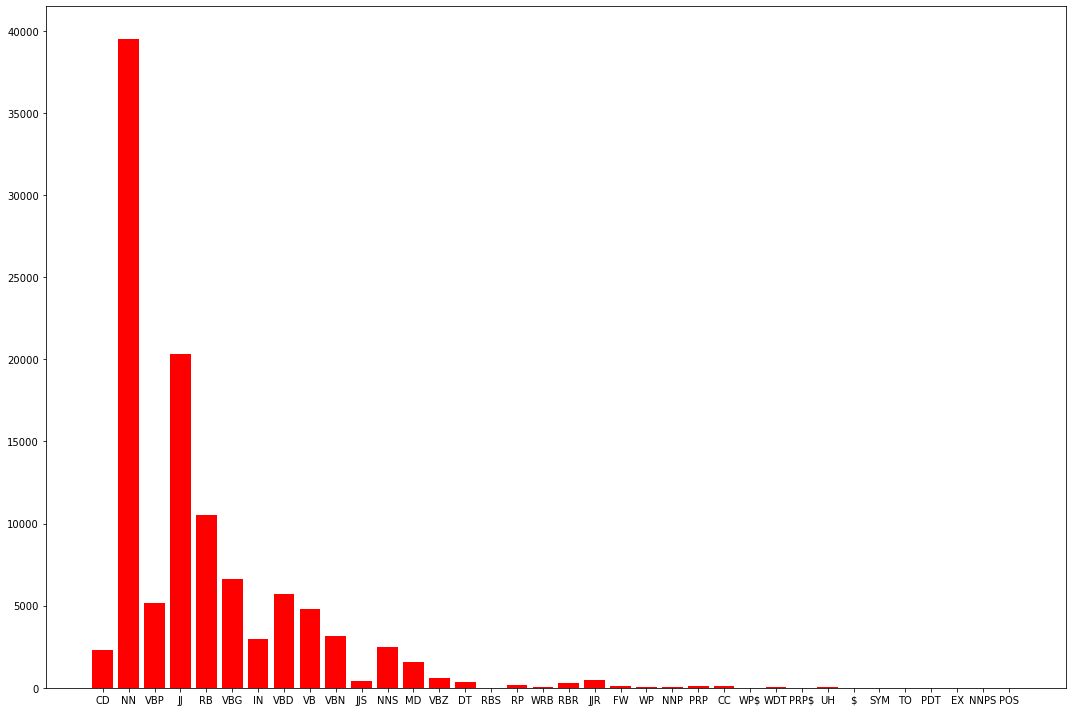

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

col = ['text']
df_old = pd.read_csv('cptsd_forum.csv', names=col, header=None)
df = pd.DataFrame({'text': df_old['text'],
                   'label': 2})
df.fillna(value='')

###tokenize title and body texts###
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(str(x).lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['text'] = df['text'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['text'])



#Text classification: pos tagging
pos_tagged_text = []

for ele in title_list:
    pos_tagged_text.append(nltk.pos_tag(ele))

    
df['pos_tagged_text'] = pos_tagged_text



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['http', 'youtube', 'org', 'com', 'php', 'index', 'www', 'nan']

def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['text'] = df['text'].apply(lambda x: exclude(x))

for item in df['pos_tagged_text']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])

            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags''' 
pos_list = []
for row in df['pos_tagged_text']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_text']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


df_new = pd.DataFrame({'text': df['text'],
                       'label': 2})


df_new.to_csv('cptsd_forum_clean.csv', index=False)


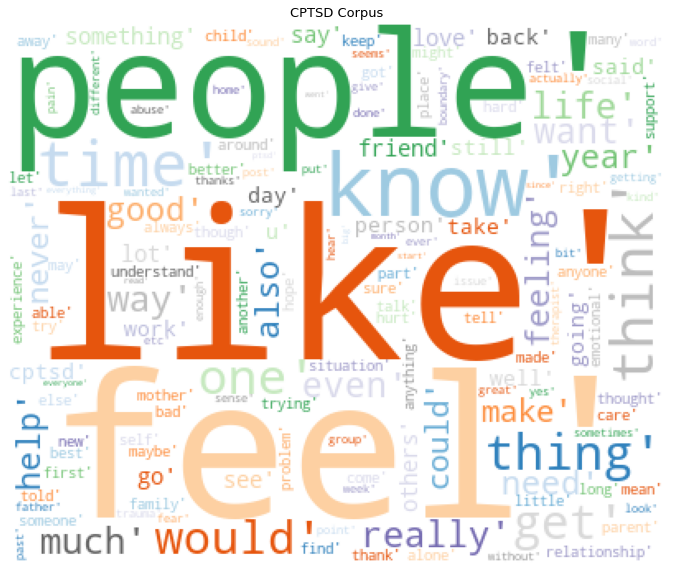

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'CPTSD Corpus')

In [7]:
df_new.head()

,text,label
NaN,[0],2
0.0,"[hi, guy, anyone, stay, high, alert, much, u, ...",2
1.0,"[29, year, old, male, never, diagnosed, ctpsd,...",2
2.0,"[hi, anyone, physical, effect, cptsd, many, le...",2
3.0,"[going, shit, ton, trauma, lately, posted, rec...",2


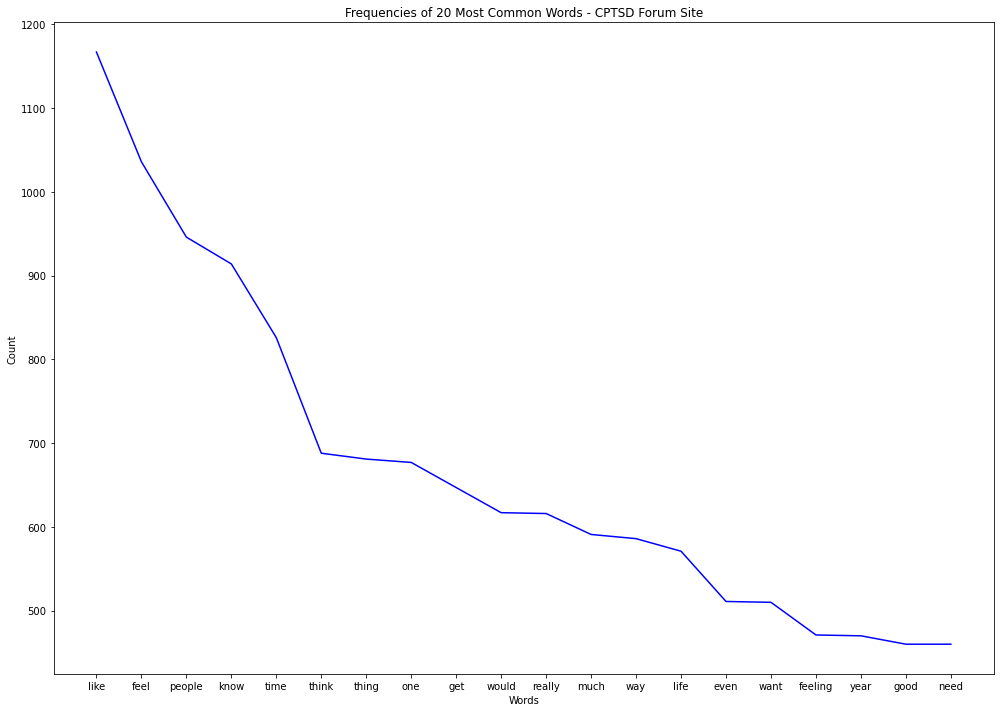

<Figure size 432x288 with 0 Axes>

In [10]:
top_20 = []
w_freq = fd.most_common(20)

freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='b')
plt.title("Frequencies of 20 Most Common Words - CPTSD Forum Site")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig("forum.png", dpi=300)